In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# 1. Load and Split Data
iris = load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 2. Train KNN
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# 3. Calculate Global Metrics (Library Functions)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='macro')
rec = recall_score(y_test, y_pred, average='macro')  # Recall is Sensitivity
f1 = f1_score(y_test, y_pred, average='macro')

# 4. Manual Calculation using Formulas (Per-Class)
cm = confusion_matrix(y_test, y_pred)
classes = iris.target_names

print(f"{'Species':<15} | Sen (Rec) | Spec | Prec (PPV) | NPV | F1-Score")
print("-" * 70)

for i in range(len(classes)):
    # Extract TP, FP, FN, TN for each class
    tp = cm[i, i]
    fp = cm[:, i].sum() - tp
    fn = cm[i, :].sum() - tp
    tn = cm.sum() - (tp + fp + fn)

    # Formulas
    sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    precision   = tp / (tp + fp) if (tp + fp) > 0 else 0
    npv         = tn / (tn + fn) if (tn + fn) > 0 else 0
    f1_manual   = 2 * (precision * sensitivity) / (precision + sensitivity) if (precision + sensitivity) > 0 else 0

    print(f"{classes[i]:<15} | {sensitivity:.3f}     | {specificity:.3f} | {precision:.3f}      | {npv:.3f} | {f1_manual:.3f}")

print(f"\nOverall Model Accuracy: {acc * 100:.2f}%")


Species         | Sen (Rec) | Spec | Prec (PPV) | NPV | F1-Score
----------------------------------------------------------------------
setosa          | 1.000     | 1.000 | 1.000      | 1.000 | 1.000
versicolor      | 1.000     | 1.000 | 1.000      | 1.000 | 1.000
virginica       | 1.000     | 1.000 | 1.000      | 1.000 | 1.000

Overall Model Accuracy: 100.00%


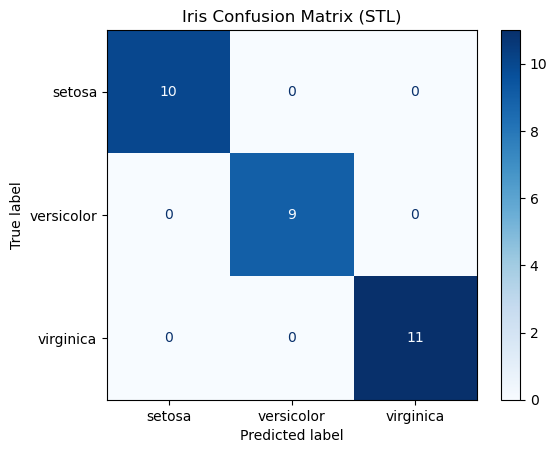

In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Load data and train KNN
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)
knn = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Generate Confusion Matrix using STL
cm = confusion_matrix(y_test, y_pred)

# Visualization
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
disp.plot(cmap=plt.cm.Blues)
plt.title("Iris Confusion Matrix (STL)")
plt.show()


========== Without STL ==========


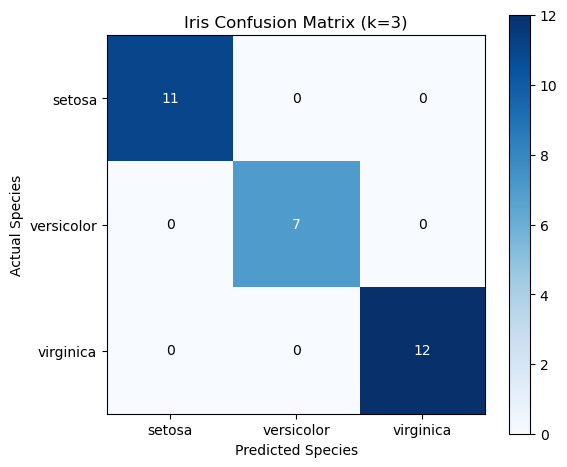

Accuracy: 100.00%


In [17]:
print("========== Without STL ==========")
import csv, math, random, urllib.request
import matplotlib.pyplot as plt

# 1. DATA LOADING: Using a stable direct data link
def load_iris_data():
    # Direct raw data from UCI repository
    url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
    headers = {'User-Agent': 'Mozilla/5.0'}
    try:
        req = urllib.request.Request(url, headers=headers)
        with urllib.request.urlopen(req) as resp:
            lines = resp.read().decode('utf-8').strip().splitlines()
        
        dataset = []
        for line in csv.reader(lines):
            # Iris dataset has 4 features + 1 label
            if len(line) == 5:
                dataset.append([float(x) for x in line[:4]] + [line[4]])
        return dataset
    except Exception as e:
        print(f"Error loading data: {e}")
        return []

# 2. KNN CORE LOGIC
def euclidean_distance(row1, row2):
    return math.sqrt(sum((row1[i] - row2[i])**2 for i in range(len(row1)-1)))

def get_neighbors(train, test_row, k):
    distances = [(train_row, euclidean_distance(test_row, train_row)) for train_row in train]
    distances.sort(key=lambda x: x[1]) # Sort by distance
    return [distances[i][0] for i in range(k)]

def predict_class(neighbors):
    votes = [n[-1] for n in neighbors]
    return max(set(votes), key=votes.count)

# 3. CONFUSION MATRIX LOGIC (Manual)
def build_confusion_matrix(actual, predicted, labels):
    size = len(labels)
    matrix = [[0 for _ in range(size)] for _ in range(size)]
    label_to_idx = {label: i for i, label in enumerate(labels)}
    for a, p in zip(actual, predicted):
        matrix[label_to_idx[a]][label_to_idx[p]] += 1
    return matrix

# --- Execution ---
data = load_iris_data()
if data:
    random.seed(2026)
    random.shuffle(data)
    
    # Split 80% Train, 20% Test
    split = int(len(data) * 0.8)
    train_set, test_set = data[:split], data[split:]
    
    species_list = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
    k = 3
    actual_labels, predicted_labels = [], []

    for row in test_set:
        neighbors = get_neighbors(train_set, row, k)
        pred = predict_class(neighbors)
        actual_labels.append(row[-1])
        predicted_labels.append(pred)

    # 4. PLOTTING THE CONFUSION MATRIX
    cm = build_confusion_matrix(actual_labels, predicted_labels, species_list)
    fig, ax = plt.subplots(figsize=(6, 5))
    im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    ax.figure.colorbar(im, ax=ax)
    
    # Label the axes
    ax.set(xticks=range(3), yticks=range(3), 
           xticklabels=[s.split('-')[1] for s in species_list], 
           yticklabels=[s.split('-')[1] for s in species_list], 
           title=f"Iris Confusion Matrix (k={k})",
           ylabel="Actual Species", xlabel="Predicted Species")
    
    # Add number annotations to cells
    for i in range(3):
        for j in range(3):
            ax.text(j, i, str(cm[i][j]), ha="center", va="center",
                    color="white" if cm[i][j] > (len(test_set)/6) else "black")
    
    plt.tight_layout()
    plt.show()
    
    accuracy = (sum(1 for a, p in zip(actual_labels, predicted_labels) if a == p)/len(test_set))*100
    print(f"Accuracy: {accuracy:.2f}%")

